In [ ]:
#These are my import statements

In [310]:
import numpy as np                                                                      
import matplotlib.pyplot as plt                                                         
import gizmo_analysis as gizmo                                                          
import utilities as ut                                                                  
import matplotlib.colors as colors 
from scipy import stats

In [311]:
#This is loading in my data and defining some parameters

In [372]:
redshift = 0
simulation_directory = "/Users/micahoeur/Desktop/m12q.res57000"
part = gizmo.io.Read.read_snapshots(['star', 'gas', 'dark'], 'redshift', 0, simulation_directory, assign_hosts_rotation=True)

part['star'].prop('host.distance.principal.cylindrical')
rxyz = part['star'].prop('host.distance.total')
Rxy = part['star'].prop('host.distance.principal.cylindrical')[:,0]
phi = part['star'].prop('host.distance.principal.cylindrical')[:,1]
z = part['star'].prop('host.distance.principal.cylindrical')[:,2]
x = part['star'].prop('host.distance.principal.cartesian')[:,0]
y = part['star'].prop('host.distance.principal.cartesian')[:,1]
z = part['star'].prop('host.distance.principal.cartesian')[:,2]
vx = part['star'].prop('host.velocity.principal.cartesian')[:,0]
vy = part['star'].prop('host.velocity.principal.cartesian')[:,1]
vz = part['star'].prop('host.velocity.principal.cartesian')[:,2]
age = part['star'].prop('age')
mass = part['star'].prop('mass')
feh = part['star'].prop('metallicity.fe')


# in utilities.simulation.Snapshot():
* reading:  Users/micahoeur/Desktop/m12q.res57000/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/micahoeur/Desktop/m12q.res57000/output/snapshot_600.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 16220880 particles
    dark2     (id = 2): 4132251 particles
    gas       (id = 0): 12625997 particles
    star      (id = 4): 3839921 particles
    blackhole (id = 5): 0 particles

* reading species: ['star', 'gas', 'dark']
* reading particles from:
    Users/micahoeur/Desktop/m12q.res57000/output/snapshot_600.hdf5

* reading cosmological parameters from:  Users/micahoeur/Desktop/m12q.res57000/initial_condition/ic_agora_m12q.conf

* checking sanity of particle properties

  read 1 host (position, velocity, rotation, axis ratios) from:  Users/micahoeur/Desktop/m12q.res57000/track/host_coordinates.hdf5
  host1 

In [313]:
bins=60

In [314]:
#I want to centre my sun at R_gal=8kpc and consider the area around it out to 1kpc. Therefore, I define a "donut" of a swath 7kpc < R_gal < 9kpc that is swung about the galactic centre creating my solar annulus  

In [365]:
keep_donut = np.where((7 <= Rxy) & ( Rxy <= 9) & (z <= np.abs(1.5)))

In [316]:
#relevant parameters: vz, z, and feh. Restrict these to my regime. How many points in my donut regime: 120196

In [366]:
vz_don = vz[keep_donut] 
z_don = z[keep_donut]
feh_don = feh[keep_donut]
print(len(z_don))

120196


In [367]:
min(z_don)

-96.53883766218172

In [368]:
max(z_don)

1.4999964041210627

In [ ]:
#ask Sarah about these!

In [ ]:
#This plots a histogram of z_don and shows it

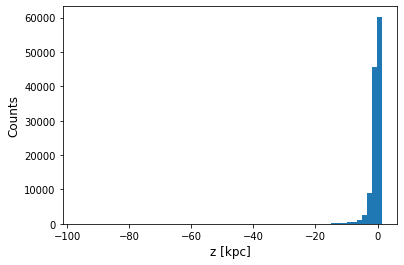

In [361]:
plt.hist(z_don, bins=bins)
plt.xlabel('z [kpc]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [318]:
#This plots a histogram of vz_don and shows it

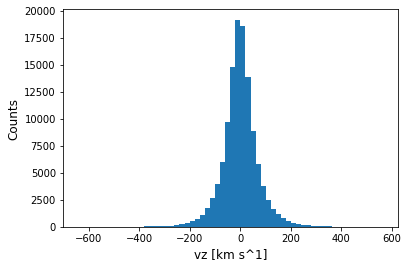

In [319]:
plt.hist(vz_don, bins=bins)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [320]:
#We can set the range from -200 to 200 because that's where the bulk of the data is

In [321]:
#This creates a 2d histogram called density and it plots vz_don on the x axis and z_don on the y; the range is constrained to the bulk of the data

In [322]:
den, xedges1, yedges1  = np.histogram2d(vz_don, z_don, range=[[-80, 80], [-1.5, 1.5]], bins=bins) 

In [323]:
#print(xedges1)

In [324]:
total=(np.sum(den))
nden= den/total
#print(total)
#print(nden)
#print(den)

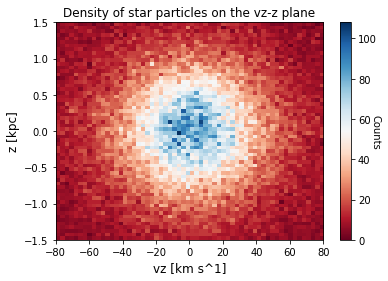

In [325]:
plt.imshow(den, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'))
cbar = plt.colorbar()
cbar.set_label('Counts', rotation=270)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.title('Density of star particles on the vz-z plane')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


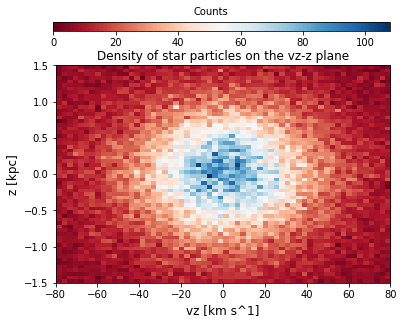

In [326]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(den, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'))
cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(45.0, 200, 'Counts')
#cbar.set_label('Counts', verticalalignment='baseline', fontsize=12, linespacing=0.5)
#cbar.set_label('Counts', position=(1,1))
ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.title('Density of star particles on the vz-z plane')
plt.show()

In [327]:
#This line finds the mean feh values for each 2d histogram bin

In [328]:
feh_don_mean, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(vz_don, z_don, feh_don, 'mean', range=[[-80, 80], [-1.5, 1.5]], bins=bins)

In [329]:
#print(feh_don_mean)

In [330]:
#Find range where the bulk of the distribution of feh averages lies

In [331]:
#print(np.nanmin(feh_don_mean))
#print(np.nanmax(feh_don_mean))

In [332]:
flat=np.ndarray.flatten(feh_don_mean)

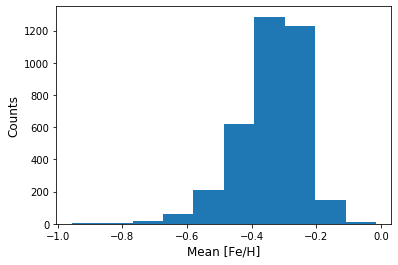

In [333]:
plt.hist(flat, bins=10)
plt.xlabel('Mean [Fe/H]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

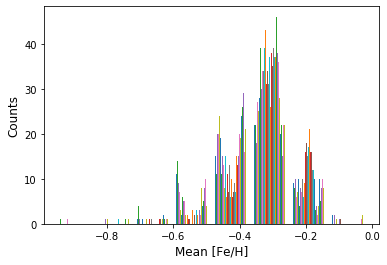

In [334]:
plt.hist(feh_don_mean, bins=8)
plt.xlabel('Mean [Fe/H]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [335]:
#This range looks like it goes from -0.6 to -0.1. By setting my range, I can disconsider outliers.

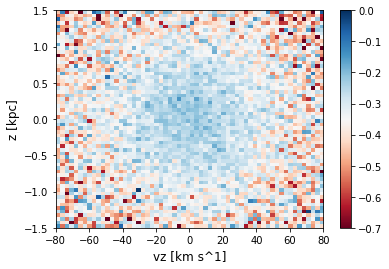

In [336]:
plt.imshow(feh_don_mean, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'), vmin=-0.7, vmax=0)
plt.colorbar()
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


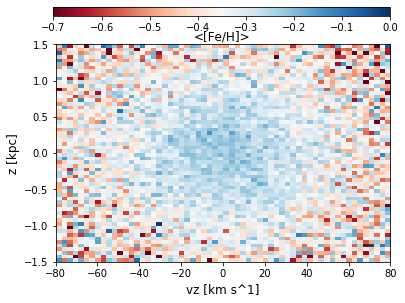

In [337]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(feh_don_mean, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'), vmin=-0.7, vmax=0)
cbaxes = fig.add_axes([0.12, 0.98, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
cbar.set_label('<[Fe/H]>', verticalalignment='center', fontsize=12, linespacing=0.3)
#cbar.set_label('Counts', position=(1,1))
ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.show()


In [338]:
#This line will create a mask for those feh_don_mean values where the density in the den bins is less than let's say 10 star particles

In [344]:
mfeh_don_mean=np.ma.masked_where(den < 12, feh_don_mean)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


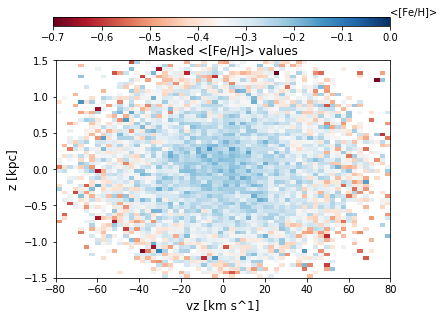

In [345]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mfeh_don_mean, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'), vmin=-0.7, vmax=0)
cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.0, 0.21, '<[Fe/H]>')
#cbar.set_label('<[Fe/H]>', verticalalignment='center', fontsize=12, linespacing=0.3)
#cbar.set_label('Counts', position=(1,1))
ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.title('Masked <[Fe/H]> values')
plt.show()
#My coloarbar label is whack

In [341]:
#Now, I want to plot contours on top of the masked mean feh 2d histogram 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


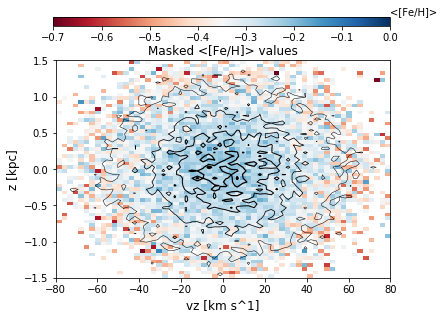

In [355]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mfeh_don_mean, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'), vmin=-0.7, vmax=0)
img2 = ax1.contour(den, extent = [-80, 80, -1.5, 1.5], linewidths=[.5,.75,1,1.25,2], colors='black', levels = [20, 40, 60, 80, 100])

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.0, 0.21, '<[Fe/H]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.title('Masked <[Fe/H]> values')
plt.show()

In [ ]:
#changed linewidths

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


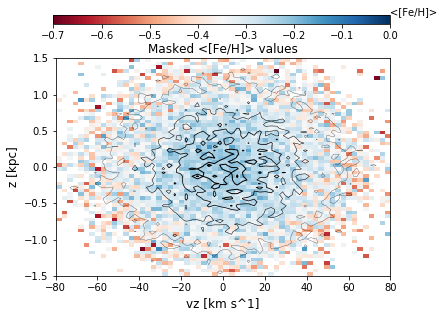

In [354]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mfeh_don_mean, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'), vmin=-0.7, vmax=0)
img2 = ax1.contour(den, extent = [-80, 80, -1.5, 1.5], linewidths=[.25,.5,.75,1,1.25], colors='black', levels = [20, 40, 60, 80, 100])

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.0, 0.0, '<[Fe/H]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.title('Masked <[Fe/H]> values')
plt.show()

In [ ]:
#try to add crosshairs to show the centre

In [359]:
max(z_don)

1.4999964041210627

In [381]:
keep1 = np.where((7 <= Rxy) & ( Rxy <= 9) & (z == 0))
keep2 = np.where((7 <= Rxy) & ( Rxy <= 9) & (vz == 0))

In [382]:
z_don_0 = z_don[keep1]
vz_don_0 = vz_don[keep2]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


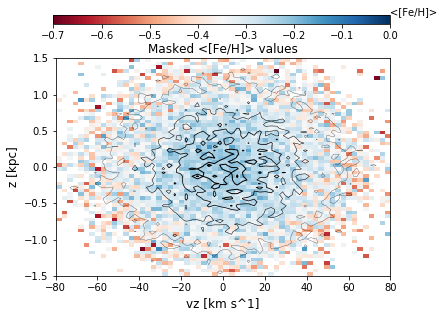

In [384]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mfeh_don_mean, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'), vmin=-0.7, vmax=0)
img2 = ax1.contour(den, extent = [-80, 80, -1.5, 1.5], linewidths=[.25,.5,.75,1,1.25], colors='black', levels = [20, 40, 60, 80, 100])
#img3 = ax1.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#img4 = ax1.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.0, 0.0, '<[Fe/H]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.title('Masked <[Fe/H]> values')
#plt.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#plt.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)
plt.show()

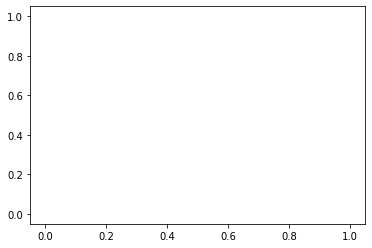

In [385]:
plt.plot(z_don_0)
plt.show()

In [386]:
print(z_don_0)

[]


In [ ]:
#it's empty, I need to generate that array of those values. 

In [408]:
def liss(r1,r2):
    return [item for item in range(r1, r2+1)]

r1, r2 = -80, 80
print(liss(r1, r2))

[-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [427]:
#liss=[-1, 0, 1]
liss=[-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]

In [429]:
print(len(liss))

161


In [430]:
def make_zeros(number):
    return [0] * number

lisst = make_zeros(161)
#lisst = make_zeros(3)

In [431]:
print(len(lisst))

161


In [396]:
#lisst

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


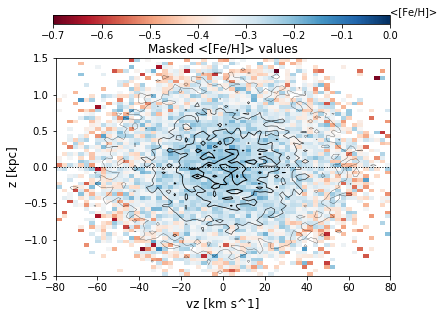

In [432]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mfeh_don_mean, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('RdBu'), vmin=-0.7, vmax=0)
img2 = ax1.contour(den, extent = [-80, 80, -1.5, 1.5], linewidths=[.25,.5,.75,1,1.25], colors='black', levels = [20, 40, 60, 80, 100])
img3 = ax1.plot(liss, lisst, 'k-', linestyle = ":", linewidth=1)
#img4 = ax1.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.0, 0.0, '<[Fe/H]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.title('Masked <[Fe/H]> values')
#plt.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#plt.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)
plt.show()

In [413]:
#x1=-1.5
#x2=1.5
#lisss = [x*0.186 for x in range(2*x1, 2*x2+1)]

TypeError: 'float' object cannot be interpreted as an integer

In [417]:
#x1=11
#x2=16
#range(x1, x2+1)

#list1 = range(x1, x2+1)
#list1


In [418]:
#list1

In [420]:
np.linspace(-1.5, 1.5, num=161)

array([-1.5    , -1.48125, -1.4625 , -1.44375, -1.425  , -1.40625,
       -1.3875 , -1.36875, -1.35   , -1.33125, -1.3125 , -1.29375,
       -1.275  , -1.25625, -1.2375 , -1.21875, -1.2    , -1.18125,
       -1.1625 , -1.14375, -1.125  , -1.10625, -1.0875 , -1.06875,
       -1.05   , -1.03125, -1.0125 , -0.99375, -0.975  , -0.95625,
       -0.9375 , -0.91875, -0.9    , -0.88125, -0.8625 , -0.84375,
       -0.825  , -0.80625, -0.7875 , -0.76875, -0.75   , -0.73125,
       -0.7125 , -0.69375, -0.675  , -0.65625, -0.6375 , -0.61875,
       -0.6    , -0.58125, -0.5625 , -0.54375, -0.525  , -0.50625,
       -0.4875 , -0.46875, -0.45   , -0.43125, -0.4125 , -0.39375,
       -0.375  , -0.35625, -0.3375 , -0.31875, -0.3    , -0.28125,
       -0.2625 , -0.24375, -0.225  , -0.20625, -0.1875 , -0.16875,
       -0.15   , -0.13125, -0.1125 , -0.09375, -0.075  , -0.05625,
       -0.0375 , -0.01875,  0.     ,  0.01875,  0.0375 ,  0.05625,
        0.075  ,  0.09375,  0.1125 ,  0.13125,  0.15   ,  0.16

In [421]:
lisss = np.linspace(-1.5, 1.5, num=161)

In [422]:
print(len(lisss))

161


In [451]:
den2, xedges1, yedges1  = np.histogram2d(vz_don, z_don, range=[[-80, 80], [-1.5, 1.5]], bins=30) 

In [467]:
mfeh_don_mean2=np.ma.masked_where(den < 15, feh_don_mean)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


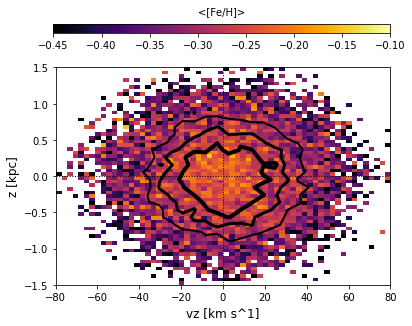

<Figure size 432x288 with 0 Axes>

In [503]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mfeh_don_mean2, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('inferno'), vmin=-0.45, vmax=-0.1)
img2 = ax1.contour(den2, extent = [-80, 80, -1.5, 1.5], linewidths=[2,3,4], colors='black', levels = [ 150, 200, 260])
img3 = ax1.plot(liss, lisst, 'k-', linestyle = ":", linewidth=1)
img4 = ax1.plot(lisst, lisss, 'k-', linestyle = ":", linewidth=1)

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(-0.3, 0.3, '<[Fe/H]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
#plt.title('Masked <[Fe/H]> values')
#plt.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#plt.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)
plt.show()


plt.savefig('/Users/micahoeur/Dropbox/Research/Stampede2/m12q.mfeh_don_mean.eps')



In [489]:
feh = part['star'].prop('metallicity.fe')
cfe = part['star'].prop('metallicity.c - metallicity.fe')
nfe = part['star'].prop('metallicity.n - metallicity.fe')
ofe = nfe = part['star'].prop('metallicity.o - metallicity.fe')
mgfe = part['star'].prop('metallicity.mg - metallicity.fe')
sife = part['star'].prop('metallicity.si - metallicity.fe')

In [490]:
cfe_don = cfe[keep_donut]
nfe_don = nfe[keep_donut]
ofe_don = ofe[keep_donut]
mgfe_don = mgfe[keep_donut]
sife_don = sife[keep_donut]

In [491]:
print(len(sife_don))

120196


In [492]:
cfe_don_mean, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(vz_don, z_don, cfe_don, 'mean', range=[[-80, 80], [-1.5, 1.5]], bins=bins)

In [493]:
nfe_don_mean, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(vz_don, z_don, nfe_don, 'mean', range=[[-80, 80], [-1.5, 1.5]], bins=bins)

In [494]:
ofe_don_mean, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(vz_don, z_don, ofe_don, 'mean', range=[[-80, 80], [-1.5, 1.5]], bins=bins)

In [495]:
mgfe_don_mean, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(vz_don, z_don, mgfe_don, 'mean', range=[[-80, 80], [-1.5, 1.5]], bins=bins)

In [496]:
sife_don_mean, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(vz_don, z_don, sife_don, 'mean', range=[[-80, 80], [-1.5, 1.5]], bins=bins)

In [497]:
mcfe_don_mean2=np.ma.masked_where(den < 15, cfe_don_mean)

In [498]:
mnfe_don_mean2=np.ma.masked_where(den < 15, nfe_don_mean)

In [499]:
mofe_don_mean2=np.ma.masked_where(den < 15, ofe_don_mean)

In [500]:
mmgfe_don_mean2=np.ma.masked_where(den < 15, mgfe_don_mean)

In [501]:
msife_don_mean2=np.ma.masked_where(den < 15, sife_don_mean)

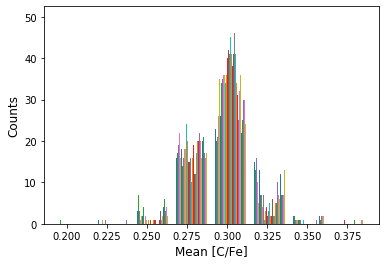

In [504]:
plt.hist(cfe_don_mean, bins=8)
plt.xlabel('Mean [C/Fe]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


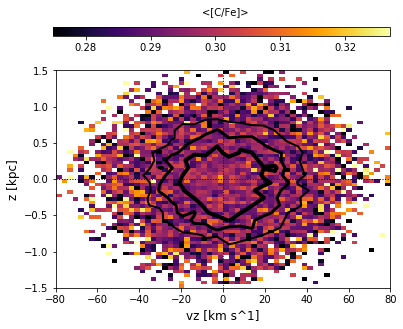

<Figure size 432x288 with 0 Axes>

In [564]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mcfe_don_mean2, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('inferno'), vmin=0.275, vmax=0.327)
img2 = ax1.contour(den2, extent = [-80, 80, -1.5, 1.5], linewidths=[2,3,4], colors='black', levels = [ 150, 200, 260])
img3 = ax1.plot(liss, lisst, 'k-', linestyle = ":", linewidth=1)
img4 = ax1.plot(lisst, lisss, 'k-', linestyle = ":", linewidth=1)

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.298, 0.4, '<[C/Fe]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
#plt.title('Masked <[Fe/H]> values')
#plt.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#plt.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)
plt.show()


plt.savefig('/Users/micahoeur/Dropbox/Research/Stampede2/m12q.mcfe_don_mean.eps')

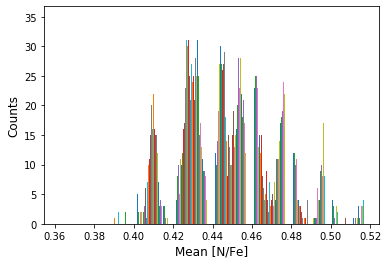

In [505]:
plt.hist(nfe_don_mean, bins=8)
plt.xlabel('Mean [N/Fe]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


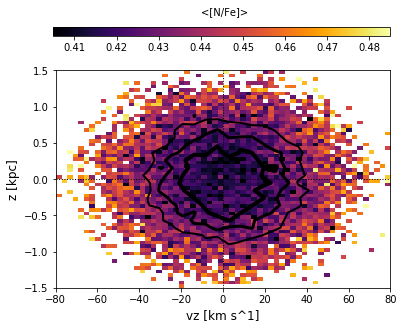

<Figure size 432x288 with 0 Axes>

In [559]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mnfe_don_mean2, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('inferno'), vmin=0.405, vmax=0.485)
img2 = ax1.contour(den2, extent = [-80, 80, -1.5, 1.5], linewidths=[2,3,4], colors='black', levels = [ 150, 200, 260])
img3 = ax1.plot(liss, lisst, 'k-', linestyle = ":", linewidth=1)
img4 = ax1.plot(lisst, lisss, 'k-', linestyle = ":", linewidth=1)

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.44, 0.60, '<[N/Fe]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
#plt.title('Masked <[Fe/H]> values')
#plt.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#plt.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)
plt.show()


plt.savefig('/Users/micahoeur/Dropbox/Research/Stampede2/m12q.mnfe_don_mean.eps')

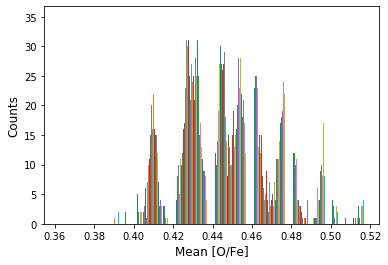

In [506]:
plt.hist(ofe_don_mean, bins=8)
plt.xlabel('Mean [O/Fe]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


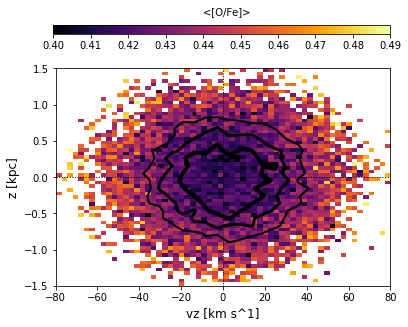

<Figure size 432x288 with 0 Axes>

In [565]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mofe_don_mean2, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('inferno'), vmin=0.4, vmax=0.49)
img2 = ax1.contour(den2, extent = [-80, 80, -1.5, 1.5], linewidths=[2,3,4], colors='black', levels = [ 150, 200, 260])
img3 = ax1.plot(liss, lisst, 'k-', linestyle = ":", linewidth=1)
img4 = ax1.plot(lisst, lisss, 'k-', linestyle = ":", linewidth=1)

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.44, 0.60, '<[O/Fe]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
#plt.title('Masked <[Fe/H]> values')
#plt.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#plt.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)
plt.show()


plt.savefig('/Users/micahoeur/Dropbox/Research/Stampede2/m12q.mofe_don_mean.eps')

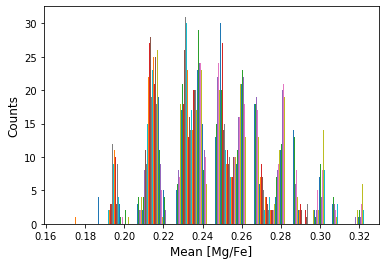

In [507]:
plt.hist(mgfe_don_mean, bins=8)
plt.xlabel('Mean [Mg/Fe]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


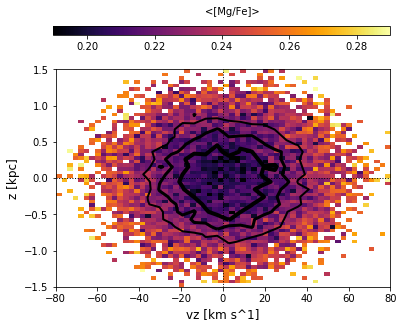

<Figure size 432x288 with 0 Axes>

In [566]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(mmgfe_don_mean2, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('inferno'), vmin=0.19, vmax=0.29)
img2 = ax1.contour(den2, extent = [-80, 80, -1.5, 1.5], linewidths=[2,3,4], colors='black', levels = [ 150, 200, 260])
img3 = ax1.plot(liss, lisst, 'k-', linestyle = ":", linewidth=1)
img4 = ax1.plot(lisst, lisss, 'k-', linestyle = ":", linewidth=1)

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.235, 0.42, '<[Mg/Fe]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
#plt.title('Masked <[Fe/H]> values')
#plt.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#plt.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)
plt.show()


plt.savefig('/Users/micahoeur/Dropbox/Research/Stampede2/m12q.mmgfe_don_mean.eps')

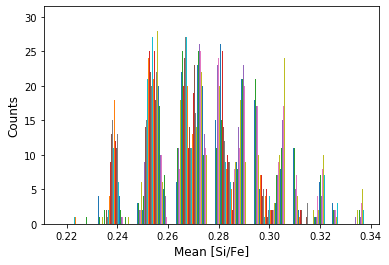

In [508]:
plt.hist(sife_don_mean, bins=8)
plt.xlabel('Mean [Si/Fe]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


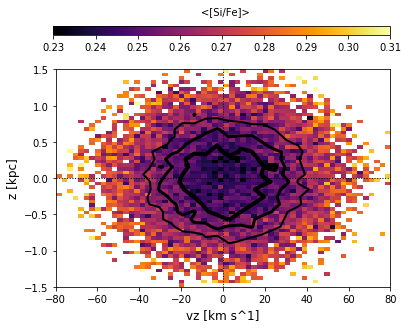

<Figure size 432x288 with 0 Axes>

In [567]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
img = ax1.imshow(msife_don_mean2, extent = [-80, 80, -1.5, 1.5], aspect='auto', cmap=plt.cm.get_cmap('inferno'), vmin=0.23, vmax=0.31)
img2 = ax1.contour(den2, extent = [-80, 80, -1.5, 1.5], linewidths=[2,3,4], colors='black', levels = [ 150, 200, 260])
img3 = ax1.plot(liss, lisst, 'k-', linestyle = ":", linewidth=1)
img4 = ax1.plot(lisst, lisss, 'k-', linestyle = ":", linewidth=1)

cbaxes = fig.add_axes([0.12, 1.0, 0.78, 0.03])
cbar = plt.colorbar(img, cax=cbaxes, orientation='horizontal')
plt.text(0.265, 0.42, '<[Si/Fe]>')

ax2 = fig.add_subplot(111)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
#plt.title('Masked <[Fe/H]> values')
#plt.plot(z_don_0, 'k-', linestyle = ":", linewidth=1)
#plt.plot(vz_don_0, 'k-', linestyle = ":", linewidth=1)
plt.show()


plt.savefig('/Users/micahoeur/Dropbox/Research/Stampede2/m12q.msife_don_mean.eps')